In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer, make_column_transformer
# sklearn.compose: The sklearn.compose module is a submodule of the sklearn library for machine learning in Python. It provides functions for creating complex preprocessing and modeling pipelines.
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler
#sklearn.preprocessing: The sklearn.preprocessing module is a submodule of the sklearn library that provides functions for preprocessing data, such as scaling and normalizing features, imputing missing values, and encoding categorical variables.
from sklearn.linear_model import Ridge,LinearRegression,Lasso
# sklearn.linear_model: The sklearn.linear_model module is a submodule of the sklearn library that provides functions for fitting linear models for regression and classification.
from sklearn.pipeline import make_pipeline
# sklearn.pipeline: The sklearn.pipeline module is a submodule of the sklearn library that provides functions for creating and working with pipelines of transformers and models.
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, RandomizedSearchCV, cross_val_score, KFold
# sklearn.model_selection: The sklearn.model_selection module is a submodule of the sklearn library that provides functions for splitting data into training and test sets, evaluating models using cross-validation, and hyperparameter tuning.
from sklearn.dummy import DummyRegressor
# sklearn.dummy: The sklearn.dummy module is a submodule of the sklearn library that provides simple dummy models for regression and classification.

from sklearn.metrics import *
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
import my_functions
 


In [2]:
# chargement et affichage des données
data = pd.read_csv('../data.csv')
def classify_bmi(row):
    if row["bmi"] < 25:
        return "normal"
    elif row["bmi"] < 30:
        return "overweight"
    else:
        return "obese"

data["bmi_class"] = data.apply(classify_bmi, axis=1)

# Remove duplicates from the 'data' DataFrame
df = data.drop_duplicates()


In [3]:
# Select the 'charges' column and store it in a separate DataFrame
y = df[['charges']]

# Drop the 'charges' column from the 'data' DataFrame and store the rest of the columns in a separate DataFrame
X = df.drop(columns=['charges'])

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X[['smoker']])
# shuffle: This is a boolean parameter that determines whether the data should be shuffled before splitting. If True, the data will be shuffled randomly before the split. If False, the data will be split in the order it is in the DataFrame.
# train_size: This is a float parameter that determines the proportion of the data that should be included in the training set. For example, if train_size=0.8, 80% of the data will be included in the training set and the remaining 20% will be included in the test set.
# random_state: This is an optional integer parameter that sets the random seed for shuffling the data. This can be useful for reproducibility of the split.

numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude= np.number)

# Create a preprocessing pipeline for numerical features
numerical_pipeline = make_pipeline(StandardScaler())

# Create a preprocessing pipeline for categorical features
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
# The handle_unknown parameter of the OneHotEncoder transformer in scikit-learn is used to specify how the transformer should handle categorical levels (i.e., categories) that are present in the test data but not in the training data.


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X[['smoker']])
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude= np.number)
numerical_pipeline = make_pipeline(StandardScaler(with_mean=False))
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                (categorical_pipeline, categorical_features)
                                )

In [4]:
print("LR without Cross Validation")
print("="*50)
model = make_pipeline(preprocessor, LinearRegression())
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
model.score(X_test, y_test)

LR without Cross Validation


0.8190058280369791

In [5]:
print("LR with Cross Validation")
print("="*50)
print()
model = make_pipeline(preprocessor, LinearRegression())
scores = cross_val_score(model, X_train, y_train, cv=10)
print(scores)
model.fit(X_train, y_train)
model.score(X_test, y_test)

LR with Cross Validation

[0.69554494 0.77739721 0.72434149 0.75347026 0.763884   0.69695614
 0.7831847  0.77362682 0.7016041  0.6123441 ]


0.8190058280369791

In [6]:
print("LR with Kfold Cross Validation")
print("="*50)
print()
model = make_pipeline(preprocessor, LinearRegression())

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
model.fit(X_train, y_train)
model.score(X_test, y_test)

LR with Kfold Cross Validation



0.8190058280369791

In [7]:
print("LASSO")
print("="*50)
print()
#model = make_pipeline(preprocessor, Lasso(max_iter=100000, tol=0.0001,random_state=42, selection='cyclic'))
#param_grid = {'lasso__alpha': np.linspace(0.01,100,1000)}
#grid_search = GridSearchCV(model, param_grid, cv=5)
#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_
#print(best_params)
#model = grid_search.best_estimator_
print('Lasso best alpha =  75.6781081081081')
best={'lasso__alpha': 75.6781081081081}
model = make_pipeline(preprocessor, Lasso(alpha=best["lasso__alpha"],max_iter=100000,random_state=42))
model.fit(X_train, y_train)
model.score(X_test, y_test)

LASSO

Lasso best alpha =  75.6781081081081


0.8202293518262205

In [8]:
print("LASSO with PolynomialFeatures(degree=2)")
print("="*50)
print()
# model = make_pipeline(preprocessor, PolynomialFeatures(degree=2), Lasso(max_iter=100000, tol=0.0001,random_state=42, selection='cyclic'))
#param_grid = {'lasso__alpha': np.linspace(0.01,100,1000)}
#grid_search = GridSearchCV(model, param_grid, cv=5)
#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_
#print(best_params)
#model = grid_search.best_estimator_


print('Lasso best alpha =  43.84945945945945')
print("time to find best alpha : 10min 27.6s")
best={'lasso__alpha': 43.84945945945945}
Lasso_model = make_pipeline(preprocessor, PolynomialFeatures(degree=2), Lasso(alpha=best["lasso__alpha"],max_iter=100000,random_state=42))
Lasso_model.fit(X_train, y_train)

print(f"Lasso Score with PolynomialFeatures(degree=2) : {Lasso_model.score(X_test, y_test)}")
metrics = []
y_pred = Lasso_model.predict(X_test)
R2 = r2_score(y_pred , y_test).round(4)
MAE = mean_absolute_error(y_pred , y_test)
RMSE = np.sqrt(mean_squared_error(y_pred , y_test))

metrics.append([R2, MAE, RMSE])

print(metrics)

LASSO with PolynomialFeatures(degree=2)

Lasso best alpha =  43.84945945945945
time to find best alpha : 10min 27.6s
Lasso Score with PolynomialFeatures(degree=2) : 0.9226943483692917
[[0.9124, 1958.1224519928237, 3338.268531727755]]


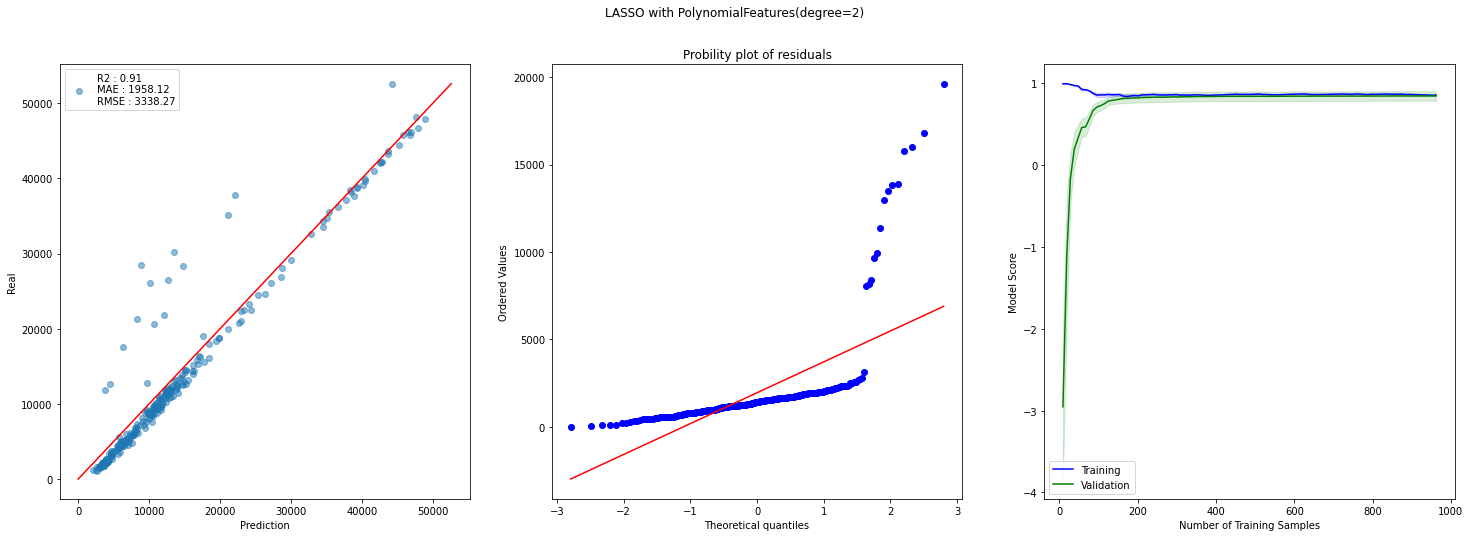

In [9]:
my_functions.plot_lasso_results('LASSO with PolynomialFeatures(degree=2)', Lasso_model, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X[['smoker']])
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude= np.number)
numerical_pipeline = make_pipeline(StandardScaler(with_mean=False))
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                (categorical_pipeline, categorical_features)
                                )

print("LASSO with PolynomialFeatures(degree=1)")
print("="*50)
print()
#model = make_pipeline(preprocessor, PolynomialFeatures(degree=1), Lasso(max_iter=100000, tol=0.0001,random_state=42, selection='cyclic'))
#param_grid = {'lasso__alpha': np.linspace(0.01,100,1000)}
#grid_search = GridSearchCV(model, param_grid, cv=5)
#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_
#print(best_params)
#model = grid_search.best_estimator_


print('Lasso best alpha =  75.6781081081081')
print("time to find best alpha : 1min 10.6s")
best={'lasso__alpha': 75.6781081081081}
Lasso_model_PolynomialFeatures_1 = make_pipeline(preprocessor, PolynomialFeatures(degree=2), Lasso(alpha=best["lasso__alpha"],max_iter=100000,random_state=42))
Lasso_model_PolynomialFeatures_1.fit(X_train, y_train)

print(f"Lasso Score with PolynomialFeatures(degree=1) : {Lasso_model_PolynomialFeatures_1.score(X_test, y_test)}")
metrics = []
y_pred = Lasso_model_PolynomialFeatures_1.predict(X_test)
R2 = r2_score(y_pred , y_test).round(4)
MAE = mean_absolute_error(y_pred , y_test)
RMSE = np.sqrt(mean_squared_error(y_pred , y_test))

metrics.append([R2, MAE, RMSE])

print(metrics)

LASSO with PolynomialFeatures(degree=1)

Lasso best alpha =  75.6781081081081
time to find best alpha : 1min 10.6s
Lasso Score with PolynomialFeatures(degree=1) : 0.9230175422340751
[[0.9121, 1974.9367271037477, 3331.283027407874]]


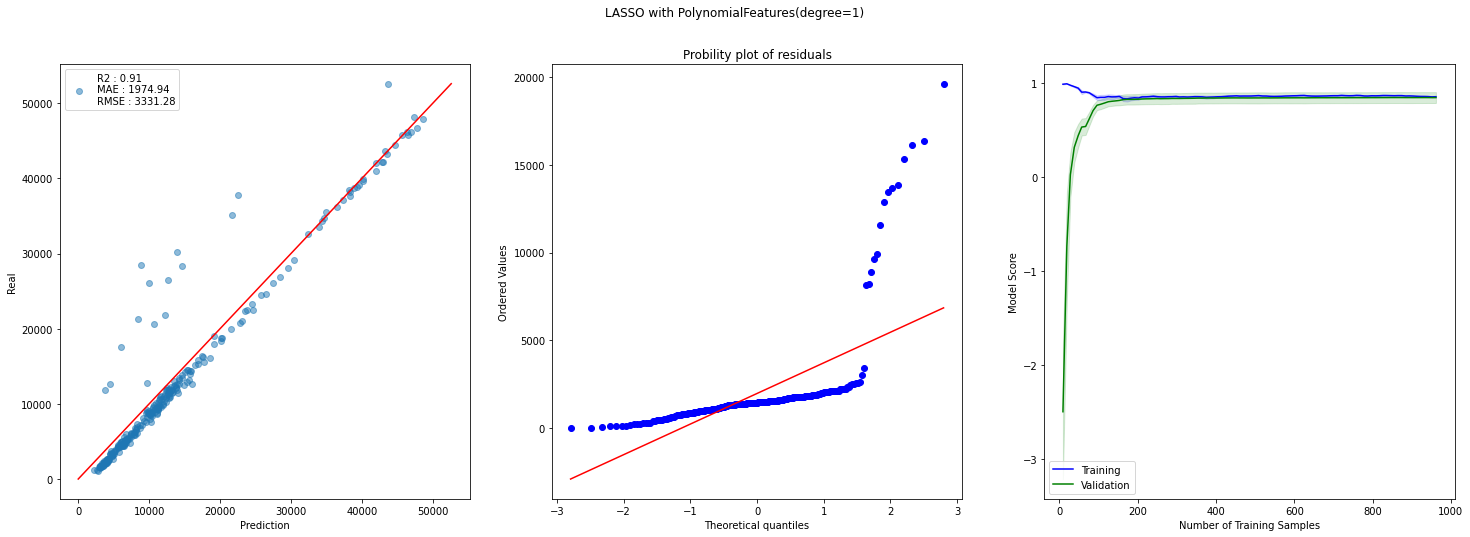

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X[['smoker']])
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude= np.number)
numerical_pipeline = make_pipeline(StandardScaler(with_mean=False))
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                (categorical_pipeline, categorical_features)
                                )
                                
my_functions.plot_lasso_results('LASSO with PolynomialFeatures(degree=1)', Lasso_model_PolynomialFeatures_1, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=True)